In [1]:
import numpy as np
import pandas as pd
import cv2
import json
import os
import requests
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw,ImageEnhance


In [2]:
with open('cat_dog_annotations.json', 'r') as f:
    json_dict = json.load(f)





In [3]:
type(json_dict)

dict

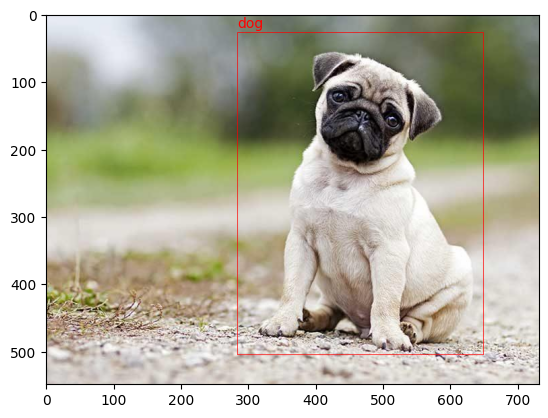

In [4]:

#Step1 fetch one image and add angle on it 

# Extract first image and region
img_dict = list(json_dict['_via_img_metadata'].values())[0]
region_dict = img_dict['regions'][0]
region_attri=region_dict['region_attributes']
shape_dict = region_dict['shape_attributes']
label=list(region_attri['class'].keys())[0]

x = shape_dict['x']
y = shape_dict['y']
plt.text(x, y-8, label, color='r')

# Load image and draw bounding box
img = Image.open(img_dict['filename'])
draw = ImageDraw.Draw(img)

draw.rectangle((shape_dict['x'], shape_dict['y'], shape_dict['x'] + shape_dict['width'], shape_dict['y'] + shape_dict['height']), outline='red')




plt.imshow(img)



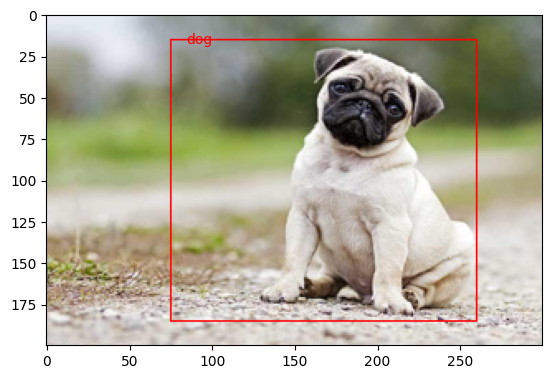

In [21]:

#Step 2 & 3 resize image along its bounding box

# Extract first image and region
img_dict = list(json_dict['_via_img_metadata'].values())[0]
region_dict = img_dict['regions'][0]
region_attri=region_dict['region_attributes']
shape_dict = region_dict['shape_attributes']
label=list(region_attri['class'].keys())[0]

x = shape_dict['x']
y = shape_dict['y']
plt.text(x-200, y-10, label, color='r')

# Load image and draw bounding box
img = Image.open(img_dict['filename'])
# draw = ImageDraw.Draw(img)

draw.rectangle((shape_dict['x'], shape_dict['y'], shape_dict['x'] + shape_dict['width'], shape_dict['y'] + shape_dict['height']), outline='red')

# Display image
# plt.imshow(img)
new_img = img.resize((300, 200))
draw = ImageDraw.Draw(new_img)
box_size = 170
center_x = new_img.size[0] / 2
center_y = new_img.size[1] / 2
box_coords = (center_x+10 - box_size /2, center_y - box_size / 2,
center_x+25 + box_size / 2, center_y + box_size / 2)
draw.rectangle(box_coords, outline="red", width=1)

plt.imshow(new_img)
# img.show()


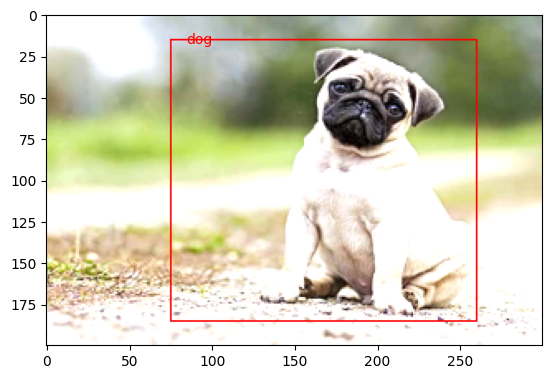

In [22]:

#Step 4 add brightness on resized image
plt.text(x-200, y-10, label, color='r')
x = shape_dict['x']
y = shape_dict['y']
new_img = img.resize((300, 200))
draw = ImageDraw.Draw(new_img)
box_size = 170
center_x = new_img.size[0] / 2
center_y = new_img.size[1] / 2
box_coords = (center_x+10 - box_size /2, center_y - box_size / 2,
center_x+25 + box_size / 2, center_y + box_size / 2)
draw.rectangle(box_coords, outline="red", width=1)
brightness = random.uniform(1, 2)
enhancer = ImageEnhance.Brightness(new_img)
img_mod = enhancer.enhance(brightness)
plt.imshow(img_mod)

In [23]:

#Step 5 rotate image at n angle
plt.text(x-200, y-10, label, color='r')
x = shape_dict['x']
y = shape_dict['y']
new_img = img.resize((300, 200))
draw = ImageDraw.Draw(new_img)
box_size = 170
center_x = new_img.size[0] / 2
center_y = new_img.size[1] / 2
box_coords = (center_x+10 - box_size /2, center_y - box_size / 2,
center_x+25 + box_size / 2, center_y + box_size / 2)
draw.rectangle(box_coords, outline="red", width=1)
brightness = random.uniform(1, 2)
enhancer = ImageEnhance.Brightness(new_img)
img_mod = enhancer.enhance(brightness)
#using PIL library 
rotate_img= img_mod.rotate(10)
# plt.imshow(rotate_img)
rotate_img.save("images/rotated_img.jpg")

In [ ]:
#Step 7 repeat 3 to 6 step for angle 0 to 355 with diff of 5 each 
output_dir='images/rotated_images/'
plt.text(x-200, y-10, label, color='r')
x = shape_dict['x']
y = shape_dict['y']
new_img = img.resize((300, 200))
draw = ImageDraw.Draw(new_img)
box_size = 170
center_x = new_img.size[0] / 2
center_y = new_img.size[1] / 2
box_coords = (center_x+10 - box_size /2, center_y - box_size / 2,
center_x+25 + box_size / 2, center_y + box_size / 2)
draw.rectangle(box_coords, outline="red", width=1)
brightness = random.uniform(1, 2)
enhancer = ImageEnhance.Brightness(new_img)
img_mod = enhancer.enhance(brightness)
#using PIL library
for angle in range(0,355,5):
    rotate_img= img_mod.rotate(angle)
#     plt.imshow(rotate_img)
#     plt.show()
    
    rotate_img.save(os.path.join(output_dir, f'rotate_img_{angle}.jpeg'))
print("rotated images are stored in directory!!")
  

rotated images are stored in directory!!
